### Import libraries

In [90]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import plot_partial_dependence, permutation_importance
import autosklearn.regression
import matplotlib.pyplot as plt
import sys
import datetime
from datetime import date, timedelta
from tqdm.notebook import tqdm
import pickle

### Read Datasets

In [91]:
inflow_df = pd.read_csv('../../dataset/reservoir_dataset_engg.csv')
inflow_df = inflow_df[inflow_df['RESERVOIR'] == 'K.R.S']
print(inflow_df.shape)
inflow_df.head()

(3274, 10)


,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,K.R.S,46.42,122.59,2029.0,2000.0,2011,1,1,0,WINTER
1,K.R.S,46.54,122.68,3084.0,1490.0,2011,1,2,1,WINTER
2,K.R.S,46.64,122.75,2776.0,1491.0,2011,1,3,2,WINTER
3,K.R.S,46.69,122.79,2311.0,1491.0,2011,1,4,3,WINTER
4,K.R.S,46.70,122.80,1847.0,1491.0,2011,1,5,4,WINTER


In [92]:
weather_df = pd.read_csv('../../dataset/Weather/mysuru_kodagu_hassan_weather.csv')
print(weather_df.shape)
weather_df.head()

(12783, 35)


,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,heavy intensity drizzle,very heavy rain,thunderstorm with heavy rain,thunderstorm with rain,thunderstorm,proximity shower rain,thunderstorm with light rain,shower rain,light intensity shower rain,light thunderstorm
0,2010-01-01,Hassan,21.77,22.02,17.22,26.35,1013.50,77.92,2.81,89.33,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-01,Kodagu,23.90,24.71,20.06,31.39,1012.17,83.50,1.55,104.21,...,0,0,0,0,0,0,0,0,0,0
2,2010-01-01,Mysuru,24.18,24.51,18.82,30.30,1012.92,68.42,2.62,90.38,...,0,0,0,0,0,0,0,0,0,0
3,2010-01-02,Hassan,20.73,20.80,14.47,27.35,1015.25,73.75,2.42,70.29,...,0,0,0,0,0,0,0,0,0,0
4,2010-01-02,Kodagu,23.56,24.41,19.18,31.88,1014.08,78.38,1.41,112.46,...,0,0,0,0,0,0,0,0,0,0


In [93]:
weather_df['YYYY'] = weather_df['date'].str[:4].astype(int)
weather_df['MM'] = weather_df['date'].str[5:7].astype(int)
weather_df['DD'] = weather_df['date'].str[8:].astype(int)
weather_df

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,thunderstorm with rain,thunderstorm,proximity shower rain,thunderstorm with light rain,shower rain,light intensity shower rain,light thunderstorm,YYYY,MM,DD
0,2010-01-01,Hassan,21.77,22.02,17.22,26.35,1013.50,77.92,2.81,89.33,...,0,0,0,0,0,0,0,2010,1,1
1,2010-01-01,Kodagu,23.90,24.71,20.06,31.39,1012.17,83.50,1.55,104.21,...,0,0,0,0,0,0,0,2010,1,1
2,2010-01-01,Mysuru,24.18,24.51,18.82,30.30,1012.92,68.42,2.62,90.38,...,0,0,0,0,0,0,0,2010,1,1
3,2010-01-02,Hassan,20.73,20.80,14.47,27.35,1015.25,73.75,2.42,70.29,...,0,0,0,0,0,0,0,2010,1,2
4,2010-01-02,Kodagu,23.56,24.41,19.18,31.88,1014.08,78.38,1.41,112.46,...,0,0,0,0,0,0,0,2010,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12778,2021-08-30,Kodagu,20.07,20.57,19.03,23.77,1009.00,93.50,1.71,241.83,...,0,0,0,0,0,0,0,2021,8,30
12779,2021-08-30,Mysuru,22.36,22.90,19.59,28.21,1009.33,82.33,5.38,253.62,...,0,0,0,0,0,0,0,2021,8,30
12780,2021-08-31,Hassan,21.86,22.21,18.87,26.31,1009.29,82.17,3.39,249.33,...,0,0,0,0,0,0,0,2021,8,31
12781,2021-08-31,Kodagu,21.29,21.81,19.03,26.23,1009.79,89.21,1.78,245.88,...,0,0,0,0,0,0,0,2021,8,31


In [94]:
kodagu_df = weather_df[weather_df['city_name'] == 'Kodagu'].reset_index(drop=True)
hassan_df = weather_df[weather_df['city_name'] == 'Hassan'].reset_index(drop=True)
mysuru_df = weather_df[weather_df['city_name'] == 'Mysuru'].reset_index(drop=True)

print(kodagu_df.shape, hassan_df.shape, mysuru_df.shape)

(4261, 38) (4261, 38) (4261, 38)


### Check Coorelation

In [95]:
m = mysuru_df.copy()
m = m.merge(inflow_df, how='outer', left_on=['YYYY', 'MM', 'DD'], right_on=['YEAR', 'MONTH', 'DATE'])
assert m.shape[0] == 4261
m.head(2)

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,2010-01-01,Mysuru,24.18,24.51,18.82,30.30,1012.92,68.42,2.62,90.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,Mysuru,23.21,23.24,16.74,29.32,1014.58,64.33,2.19,71.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
h = hassan_df.copy()
h = h.merge(inflow_df, how='outer', left_on=['YYYY', 'MM', 'DD'], right_on=['YEAR', 'MONTH', 'DATE'])
assert h.shape[0] == 4261
h.head(2)

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,2010-01-01,Hassan,21.77,22.02,17.22,26.35,1013.50,77.92,2.81,89.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,Hassan,20.73,20.80,14.47,27.35,1015.25,73.75,2.42,70.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
k = kodagu_df.copy()
k = k.merge(inflow_df, how='outer', left_on=['YYYY', 'MM', 'DD'], right_on=['YEAR', 'MONTH', 'DATE'])
assert k.shape[0] == 4261
k.head(2)

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,2010-01-01,Kodagu,23.90,24.71,20.06,31.39,1012.17,83.50,1.55,104.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,Kodagu,23.56,24.41,19.18,31.88,1014.08,78.38,1.41,112.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


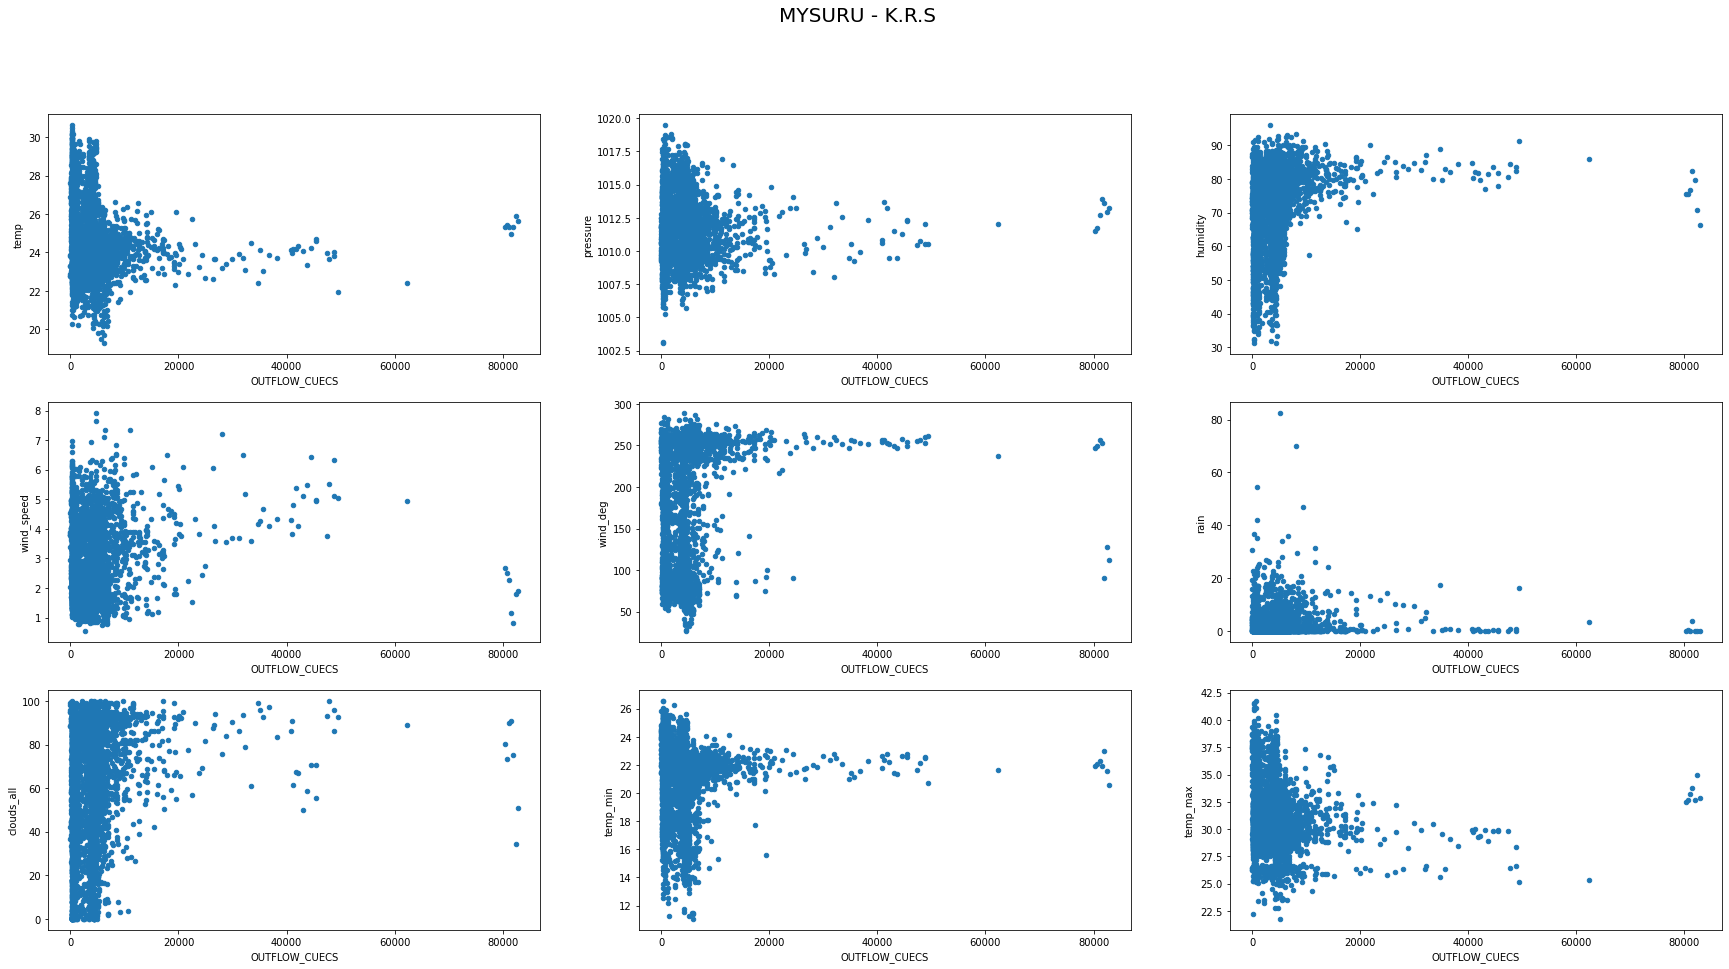

In [98]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))
m.plot(x='OUTFLOW_CUECS', y='temp', kind='scatter', ax=ax[0][0], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='pressure', kind='scatter', ax=ax[0][1], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='humidity', kind='scatter', ax=ax[0][2], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='wind_speed', kind='scatter', ax=ax[1][0], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='wind_deg', kind='scatter', ax=ax[1][1], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='rain', kind='scatter', ax=ax[1][2], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='clouds_all', kind='scatter', ax=ax[2][0], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='temp_min', kind='scatter', ax=ax[2][1], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='temp_max', kind='scatter', ax=ax[2][2], subplots=True)
fig.suptitle('MYSURU - K.R.S', fontsize=20)
plt.show()

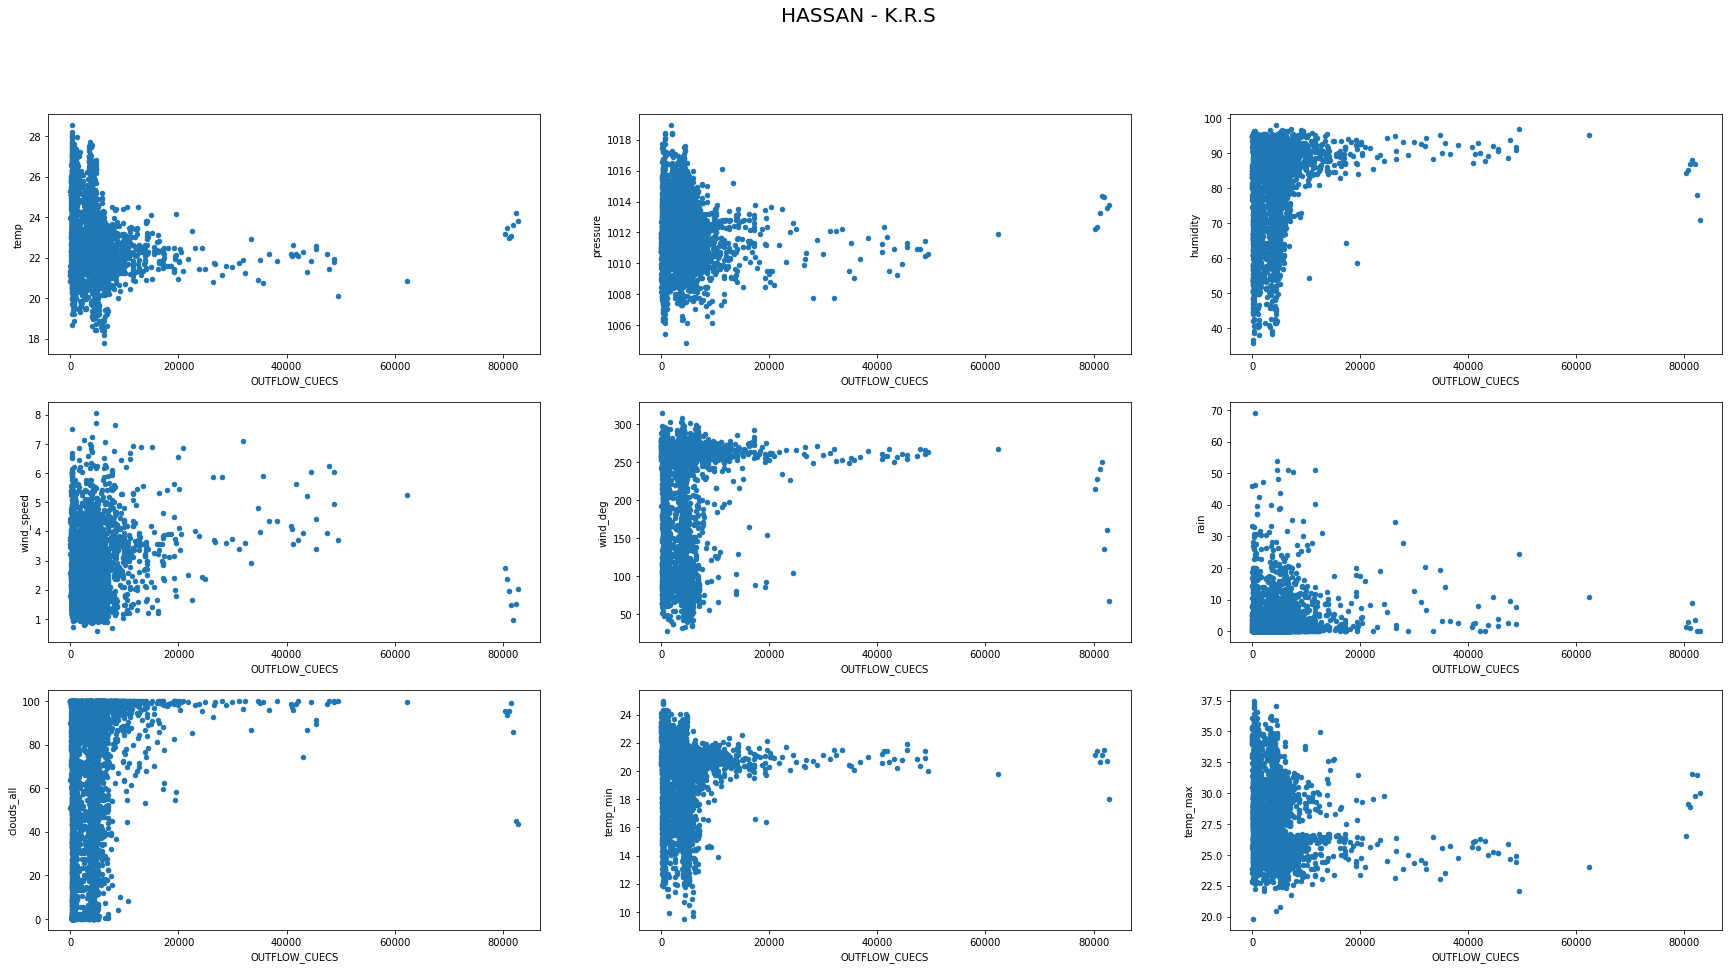

In [99]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))
h.plot(x='OUTFLOW_CUECS', y='temp', kind='scatter', ax=ax[0][0], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='pressure', kind='scatter', ax=ax[0][1], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='humidity', kind='scatter', ax=ax[0][2], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='wind_speed', kind='scatter', ax=ax[1][0], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='wind_deg', kind='scatter', ax=ax[1][1], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='rain', kind='scatter', ax=ax[1][2], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='clouds_all', kind='scatter', ax=ax[2][0], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='temp_min', kind='scatter', ax=ax[2][1], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='temp_max', kind='scatter', ax=ax[2][2], subplots=True)
fig.suptitle('HASSAN - K.R.S', fontsize=20)
plt.show()

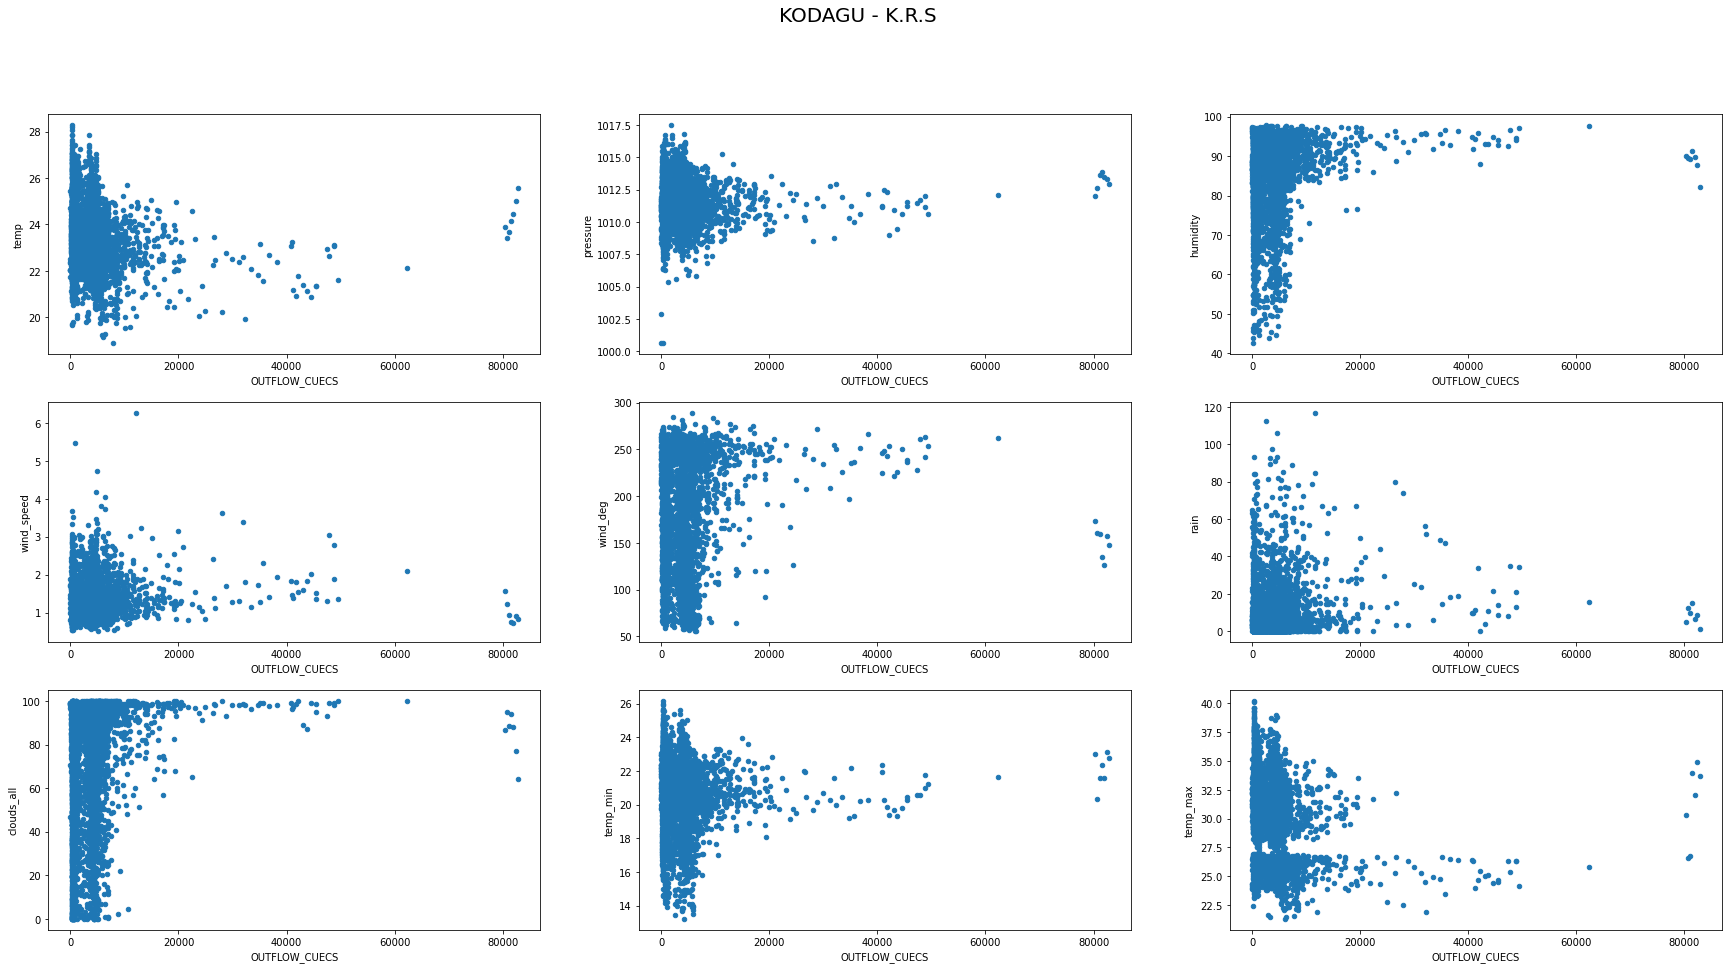

In [100]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))
k.plot(x='OUTFLOW_CUECS', y='temp', kind='scatter', ax=ax[0][0], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='pressure', kind='scatter', ax=ax[0][1], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='humidity', kind='scatter', ax=ax[0][2], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='wind_speed', kind='scatter', ax=ax[1][0], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='wind_deg', kind='scatter', ax=ax[1][1], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='rain', kind='scatter', ax=ax[1][2], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='clouds_all', kind='scatter', ax=ax[2][0], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='temp_min', kind='scatter', ax=ax[2][1], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='temp_max', kind='scatter', ax=ax[2][2], subplots=True)
fig.suptitle('KODAGU - K.R.S', fontsize=20)
plt.show()

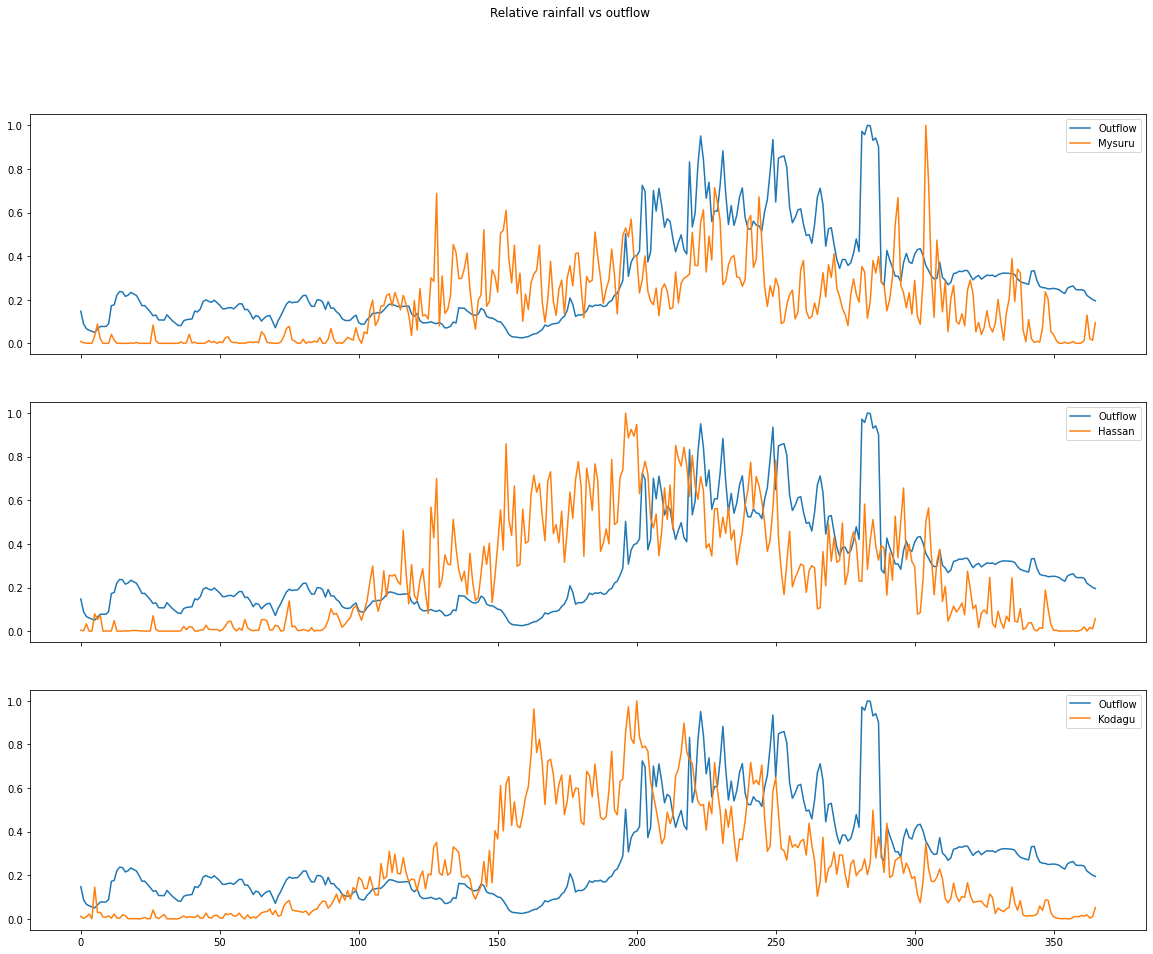

In [101]:
m.rename(columns={'rain': 'mysuru_rain'}, inplace=True)
h.rename(columns={'rain': 'hassan_rain'}, inplace=True)
k.rename(columns={'rain': 'kodagu_rain'}, inplace=True)
t = m[['YYYY', 'DD', 'MM', 'OUTFLOW_CUECS', 'mysuru_rain']].merge(h[['YYYY', 'DD', 'MM', 'OUTFLOW_CUECS', 'hassan_rain']], on=['YYYY', 'DD', 'MM', 'OUTFLOW_CUECS'], how='inner').merge(k[['YYYY', 'DD', 'MM', 'OUTFLOW_CUECS', 'kodagu_rain']], on=['YYYY', 'DD', 'MM', 'OUTFLOW_CUECS'], how='inner')
g = t.groupby(['MM', 'DD'])[['OUTFLOW_CUECS', 'mysuru_rain', 'hassan_rain', 'kodagu_rain']].mean()

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(20, 15))
ax[0].plot(range(g.shape[0]), g['OUTFLOW_CUECS'].values / g['OUTFLOW_CUECS'].max(), label='Outflow')
ax[0].plot(range(g.shape[0]), g['mysuru_rain'].values / g['mysuru_rain'].max(), label='Mysuru')
ax[1].plot(range(g.shape[0]), g['OUTFLOW_CUECS'].values / g['OUTFLOW_CUECS'].max(), label='Outflow')
ax[1].plot(range(g.shape[0]), g['hassan_rain'].values / g['hassan_rain'].max(), label='Hassan')
ax[2].plot(range(g.shape[0]), g['OUTFLOW_CUECS'].values / g['OUTFLOW_CUECS'].max(), label='Outflow')
ax[2].plot(range(g.shape[0]), g['kodagu_rain'].values / g['kodagu_rain'].max(), label='Kodagu')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.suptitle('Relative rainfall vs outflow')
plt.show()

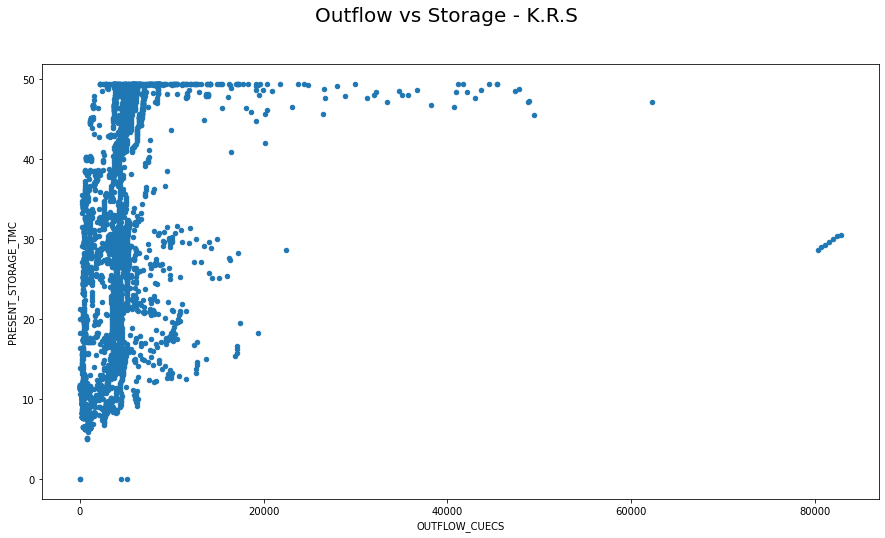

In [102]:
fig, ax = plt.subplots(figsize=(15, 8))
inflow_df.plot(x='OUTFLOW_CUECS', y='PRESENT_STORAGE_TMC', kind='scatter', ax=ax, subplots=True)
fig.suptitle('Outflow vs Storage - K.R.S', fontsize=20)
plt.show()

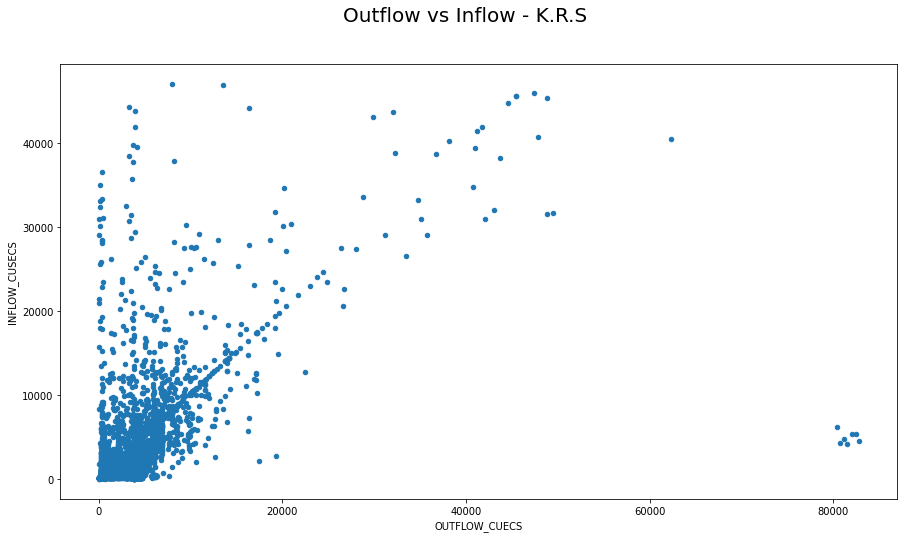

In [103]:
fig, ax = plt.subplots(figsize=(15, 8))
inflow_df.plot(x='OUTFLOW_CUECS', y='INFLOW_CUSECS', kind='scatter', ax=ax, subplots=True)
fig.suptitle('Outflow vs Inflow - K.R.S', fontsize=20)
plt.show()

In [104]:
inflow_df = inflow_df[inflow_df['OUTFLOW_CUECS'] <= 50635.33]

### Dataset Transformation

In [105]:
inflow_df = inflow_df[['INFLOW_CUSECS', 'OUTFLOW_CUECS', 'YEAR', 'MONTH', 'DATE', 'SEASON']]
inflow_df.head()

,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,SEASON
0,2029.0,2000.0,2011,1,1,WINTER
1,3084.0,1490.0,2011,1,2,WINTER
2,2776.0,1491.0,2011,1,3,WINTER
3,2311.0,1491.0,2011,1,4,WINTER
4,1847.0,1491.0,2011,1,5,WINTER


In [106]:
with open('encoders/month_le.pkl', 'rb') as f:
    month_le = pickle.load(f)

with open('encoders/date_le.pkl', 'rb') as f:
    date_le = pickle.load(f)

with open('encoders/season_le.pkl', 'rb') as f:
    season_le = pickle.load(f)

/home/santanu/Documents/WRI_Wave2WebHack/python_scripts/env/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [107]:
# month_oe = OneHotEncoder().fit(inflow_df[['MONTH']])
# date_oe = OneHotEncoder().fit(inflow_df[['DATE']])
# season_oe = OneHotEncoder().fit(inflow_df[['SEASON']])

In [108]:
rs_outflow = RobustScaler().fit(inflow_df[['OUTFLOW_CUECS']])

with open('encoders/rs_inflow.pkl', 'rb') as f:
    rs_inflow = pickle.load(f)

with open('encoders/rs_temp.pkl', 'rb') as f:
    rs_temp = pickle.load(f)

with open('encoders/rs_feels_like.pkl', 'rb') as f:
    rs_feels_like = pickle.load(f)

with open('encoders/rs_temp_min.pkl', 'rb') as f:
    rs_temp_min = pickle.load(f)

with open('encoders/rs_temp_max.pkl', 'rb') as f:
    rs_temp_max = pickle.load(f)

with open('encoders/rs_pressure.pkl', 'rb') as f:
    rs_pressure = pickle.load(f)

with open('encoders/rs_humidity.pkl', 'rb') as f:
    rs_humidity = pickle.load(f)

with open('encoders/rs_wind_speed.pkl', 'rb') as f:
    rs_wind_speed = pickle.load(f)

with open('encoders/rs_wind_deg.pkl', 'rb') as f:
    rs_wind_deg = pickle.load(f)

with open('encoders/rs_rain.pkl', 'rb') as f:
    rs_rain = pickle.load(f)

with open('encoders/rs_clouds_all.pkl', 'rb') as f:
    rs_clouds_all = pickle.load(f)

# remaining columns will be divided by 24 for scaling purpose.

/home/santanu/Documents/WRI_Wave2WebHack/python_scripts/env/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator RobustScaler from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [109]:
inflow_df['INFLOW_CUSECS'] = rs_inflow.transform(inflow_df[['INFLOW_CUSECS']]).flatten()
inflow_df['OUTFLOW_CUECS'] = rs_outflow.transform(inflow_df[['OUTFLOW_CUECS']]).flatten()
inflow_df.head()

,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,SEASON
0,0.073551,-0.379212,2011,1,1,WINTER
1,0.289397,-0.495717,2011,1,2,WINTER
2,0.226382,-0.495488,2011,1,3,WINTER
3,0.131246,-0.495488,2011,1,4,WINTER
4,0.036315,-0.495488,2011,1,5,WINTER


In [110]:
weather_df.columns

Index(['date', 'city_name', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain', 'clouds_all',
       'broken clouds', 'overcast clouds', 'scattered clouds', 'sky is clear',
       'few clouds', 'fog', 'light rain', 'mist', 'haze', 'moderate rain',
       'heavy intensity rain', 'light intensity drizzle', 'drizzle',
       'heavy intensity drizzle', 'very heavy rain',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'thunderstorm', 'proximity shower rain', 'thunderstorm with light rain',
       'shower rain', 'light intensity shower rain', 'light thunderstorm',
       'YYYY', 'MM', 'DD'],
      dtype='object')

In [111]:
weather_df['temp'] = rs_temp.transform(weather_df[['temp']]).flatten()
weather_df['feels_like'] = rs_feels_like.transform(weather_df[['feels_like']]).flatten()
weather_df['temp_min'] = rs_temp_min.transform(weather_df[['temp_min']]).flatten()
weather_df['temp_max'] = rs_temp_max.transform(weather_df[['temp_max']]).flatten()
weather_df['pressure'] = rs_pressure.transform(weather_df[['pressure']]).flatten()
weather_df['humidity'] = rs_humidity.transform(weather_df[['humidity']]).flatten()
weather_df['wind_speed'] = rs_wind_speed.transform(weather_df[['wind_speed']]).flatten()
weather_df['wind_deg'] = rs_wind_deg.transform(weather_df[['wind_deg']]).flatten()
weather_df['rain'] = rs_rain.transform(weather_df[['rain']]).flatten()
weather_df['clouds_all'] = rs_clouds_all.transform(weather_df[['clouds_all']]).flatten()
weather_df.loc[:, ('broken clouds', 'overcast clouds', 'scattered clouds', 'sky is clear',
       'few clouds', 'fog', 'light rain', 'mist', 'haze', 'moderate rain',
       'heavy intensity rain', 'light intensity drizzle', 'drizzle',
       'heavy intensity drizzle', 'very heavy rain',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'thunderstorm', 'proximity shower rain', 'thunderstorm with light rain',
       'shower rain', 'light intensity shower rain', 'light thunderstorm')] = weather_df.loc[:, ('broken clouds', 'overcast clouds', 'scattered clouds', 'sky is clear',
       'few clouds', 'fog', 'light rain', 'mist', 'haze', 'moderate rain',
       'heavy intensity rain', 'light intensity drizzle', 'drizzle',
       'heavy intensity drizzle', 'very heavy rain',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'thunderstorm', 'proximity shower rain', 'thunderstorm with light rain',
       'shower rain', 'light intensity shower rain', 'light thunderstorm')] / 24

In [112]:
weather_df.head()

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,thunderstorm with rain,thunderstorm,proximity shower rain,thunderstorm with light rain,shower rain,light intensity shower rain,light thunderstorm,YYYY,MM,DD
0,2010-01-01,Hassan,-0.736,-0.737201,-1.281690,-0.657143,0.683274,-0.156784,0.559748,-0.826564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,1
1,2010-01-01,Kodagu,0.116,0.180887,-0.281690,0.242857,0.209964,0.161345,-0.232704,-0.714651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,1
2,2010-01-01,Mysuru,0.228,0.112628,-0.718310,0.048214,0.476868,-0.698404,0.440252,-0.818667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,1
3,2010-01-02,Hassan,-1.152,-1.153584,-2.250000,-0.478571,1.306050,-0.394527,0.314465,-0.969765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,2
4,2010-01-02,Kodagu,-0.020,0.078498,-0.591549,0.330357,0.889680,-0.130559,-0.320755,-0.652602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,2


In [113]:
kodagu_df = weather_df[weather_df['city_name'] == 'Kodagu'].reset_index(drop=True)
hassan_df = weather_df[weather_df['city_name'] == 'Hassan'].reset_index(drop=True)
mysuru_df = weather_df[weather_df['city_name'] == 'Mysuru'].reset_index(drop=True)

In [114]:
train_inflow_df = inflow_df[inflow_df['YEAR'] < 2020].reset_index(drop=True)
val_inflow_df = inflow_df[inflow_df['YEAR'] == 2020].reset_index(drop=True)

train_inflow_df.shape, val_inflow_df.shape

((2936, 6), (330, 6))

In [115]:
def embed_day(df):
    data = {}
    for index in tqdm(df.index):
        row = df.iloc[index]
        inflow = row['INFLOW_CUSECS']
        outflow = row['OUTFLOW_CUECS']
        year = row['YEAR']
        month = row['MONTH']
        date = row['DATE']
        season = row['SEASON']

        ddmmyyyy = datetime.date(year, month, date)
#         ddmmyyyy_list = [ddmmyyyy]
        ddmmyyyy_list = [str(ddmmyyyy + timedelta(days=day)) for day in range(-10, 2)]

        sel_kodagu = kodagu_df[kodagu_df['date'].isin(ddmmyyyy_list)].drop(columns=['date', 'city_name', 'YYYY', 'MM', 'DD']).values.flatten()
        sel_hassan = hassan_df[hassan_df['date'].isin(ddmmyyyy_list)].drop(columns=['date', 'city_name', 'YYYY', 'MM', 'DD']).values.flatten()
        sel_mysuru = mysuru_df[mysuru_df['date'].isin(ddmmyyyy_list)].drop(columns=['date', 'city_name', 'YYYY', 'MM', 'DD']).values.flatten()
        
        month_transformed = month_le.transform([month])
        date_transformed = date_le.transform([date])
        season_transformed = season_le.transform([season])
#         month_transformed = month_oe.transform([[month]]).toarray().flatten()
#         date_transformed = date_oe.transform([[date]]).toarray().flatten()
#         season_transformed = season_oe.transform([[season]]).toarray().flatten()
        
        data[ddmmyyyy] = np.concatenate([month_transformed, date_transformed, season_transformed, sel_mysuru, [inflow], [outflow]])
#         data[ddmmyyyy] = np.concatenate([month_transformed, date_transformed, season_transformed, sel_mysuru, sel_kodagu, sel_hassan, [inflow], [outflow]])
    return pd.DataFrame(data).T

In [116]:
train_emb_df = embed_day(train_inflow_df)
val_emb_df = embed_day(val_inflow_df)

  0%|          | 0/2936 [00:00<?, ?it/s]

  0%|          | 0/330 [00:00<?, ?it/s]

In [117]:
train_emb_df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
2011-01-01,0.0,0.0,2.0,-1.196,-1.273038,-2.739437,-0.453571,-0.163701,-0.819840,-0.358491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073551,-0.379212
2011-01-02,0.0,1.0,2.0,-1.584,-1.607509,-2.288732,-0.508929,-0.042705,-0.606043,-0.283019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.289397,-0.495717
2011-01-03,0.0,2.0,2.0,-1.860,-1.798635,-2.788732,-0.675000,0.120996,-0.270810,-0.213836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.226382,-0.495488
2011-01-04,0.0,3.0,2.0,-1.476,-1.436860,-1.859155,-0.628571,0.074733,-0.247434,-0.157233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131246,-0.495488
2011-01-05,0.0,4.0,2.0,-1.136,-1.116041,-1.894366,-0.389286,0.032028,-0.275941,-0.094340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036315,-0.495488


In [118]:
X_train, y_train = train_emb_df.values[:, :-1], train_emb_df.values[:, -1]
X_val, y_val = val_emb_df.values[:, :-1], val_emb_df.values[:, -1]
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2936, 400), (2936,), (330, 400), (330,))

### Model Training

In [121]:
%%time
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=15*60,
    per_run_time_limit=120,
#     ensemble_size=1,
#     initial_configurations_via_metalearning=0,
    tmp_folder='outflow_weather_model_autosklearn_regression_tmp',
)
automl.fit(X_train, y_train, dataset_name='krs_outflow')

CPU times: user 44.4 s, sys: 1.47 s, total: 45.9 s
Wall time: 14min 55s


AutoSklearnRegressor(per_run_time_limit=120, time_left_for_this_task=900,
                     tmp_folder='outflow_weather_model_autosklearn_regression_tmp')

In [122]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: krs_outflow
  Metric: r2
  Best validation score: 0.670824
  Number of target algorithm runs: 47
  Number of successful target algorithm runs: 25
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 18



In [123]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
26           1             0.22  gradient_boosting  0.329176   8.321409
45           2             0.22  gradient_boosting  0.331637   7.315455
31           3             0.32  gradient_boosting  0.339013   9.550202
24           4             0.10         libsvm_svr  0.434806  26.679813
33           5             0.14  gradient_boosting  0.565078  55.083399


In [124]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_val)
print("Test R2 score:", r2_score(y_val, test_predictions))

Train R2 score: 0.9046866917452406
Test R2 score: 0.6939618797858453


### Predict and check Loss

In [125]:
y_pred_train = automl.predict(X_train)
y_pred_train = rs_outflow.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_train_inv_trf = rs_outflow.inverse_transform(y_train.reshape(-1, 1)).flatten()
loss = mean_squared_error(y_train_inv_trf, y_pred_train)
loss

2141568.9739535693

In [126]:
y_pred_test = automl.predict(X_val)
y_pred_test = rs_outflow.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()
y_val_inv_trf = rs_outflow.inverse_transform(y_val.reshape(-1, 1)).flatten()
loss = mean_squared_error(y_val_inv_trf, y_pred_test)
loss

7732987.245066822

### Compare Prediction on Test data

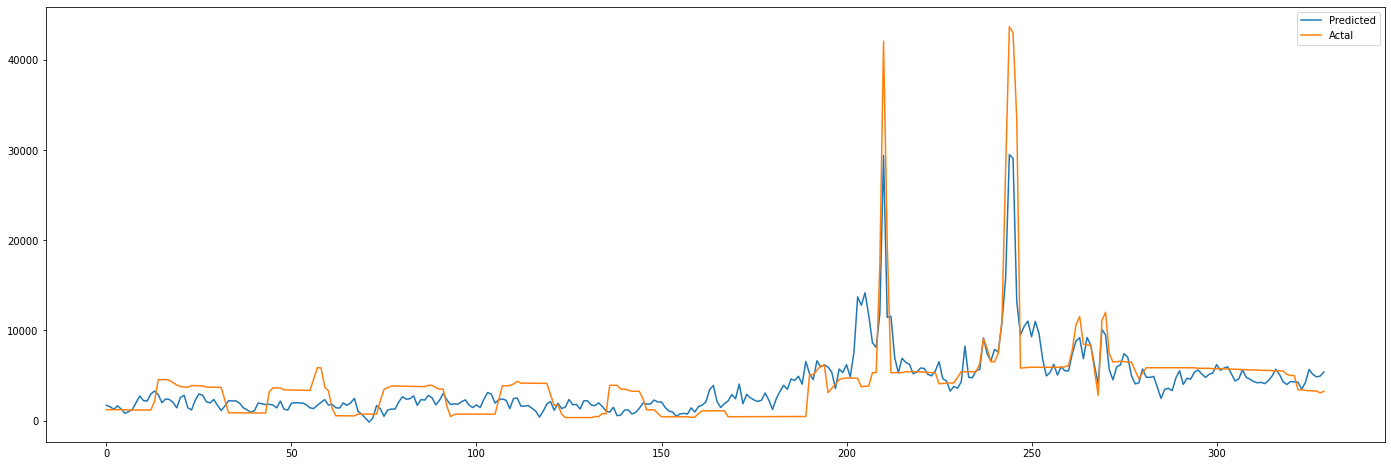

In [127]:
plt.figure(figsize=(24,8))
plt.plot(y_pred_test, label='Predicted')
plt.plot(y_val_inv_trf, label='Actal')
plt.legend()
plt.show()

### Compare Prediction on Entire data

In [128]:
y_pred = np.concatenate([y_pred_train, y_pred_test])
y_true = np.concatenate([y_train, y_val])
model_pred_df = pd.DataFrame({'y_pred': y_pred, 'y_true': y_true})
model_pred_df

,y_pred,y_true
0,2186.674421,-0.379212
1,1783.632589,-0.495717
2,1593.889800,-0.495488
3,2680.696606,-0.495488
4,1840.044604,-0.495488
...,...,...
3261,5672.478660,-0.080411
3262,5126.449058,-0.082239
3263,4847.445395,-0.088407
3264,4938.552433,-0.135237


In [129]:
inflow_pred_df = inflow_df.copy()
inflow_pred_df['Predicted_Outflow'] = y_pred
inflow_pred_df

,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,SEASON,Predicted_Outflow
0,0.073551,-0.379212,2011,1,1,WINTER,2186.674421
1,0.289397,-0.495717,2011,1,2,WINTER,1783.632589
2,0.226382,-0.495488,2011,1,3,WINTER,1593.889800
3,0.131246,-0.495488,2011,1,4,WINTER,2680.696606
4,0.036315,-0.495488,2011,1,5,WINTER,1840.044604
...,...,...,...,...,...,...,...
3269,0.373689,-0.080411,2020,12,12,WINTER,5672.478660
3270,0.312516,-0.082239,2020,12,13,WINTER,5126.449058
3271,0.277531,-0.088407,2020,12,14,WINTER,4847.445395
3272,0.176052,-0.135237,2020,12,15,WINTER,4938.552433


In [130]:
inflow_pred_df['OUTFLOW_CUECS'] = rs_outflow.inverse_transform(inflow_pred_df[['OUTFLOW_CUECS']])
inflow_pred_df.head()

,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,SEASON,Predicted_Outflow
0,0.073551,2000.0,2011,1,1,WINTER,2186.674421
1,0.289397,1490.0,2011,1,2,WINTER,1783.632589
2,0.226382,1491.0,2011,1,3,WINTER,1593.889800
3,0.131246,1491.0,2011,1,4,WINTER,2680.696606
4,0.036315,1491.0,2011,1,5,WINTER,1840.044604


In [131]:
avg_daily_pred_outflow = inflow_pred_df.groupby(['MONTH', 'DATE'])['Predicted_Outflow'].mean().values
avg_daily_actual_outflow = inflow_pred_df.groupby(['MONTH', 'DATE'])['OUTFLOW_CUECS'].mean().values

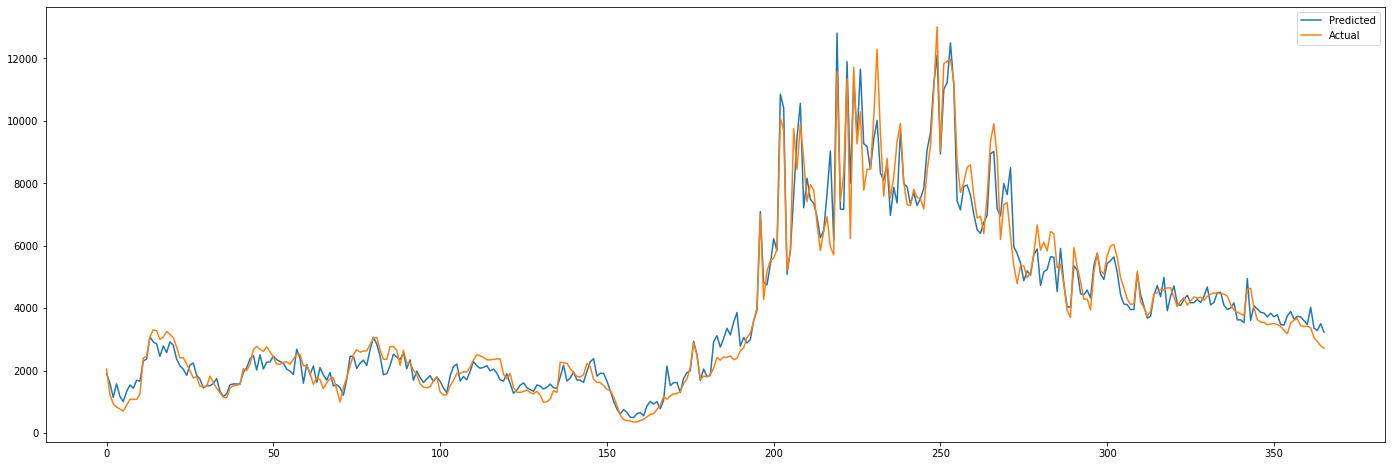

In [132]:
plt.figure(figsize=(24, 8))
plt.plot(avg_daily_pred_outflow, label='Predicted')
plt.plot(avg_daily_actual_outflow, label='Actual')
plt.legend()
# ax2.plot(avg_daily_actual_rainfall, label='Actual')
plt.show()

In [133]:
inflow_pred_df.sort_values(by=['YEAR', 'MONTH', 'DATE'], inplace=True)

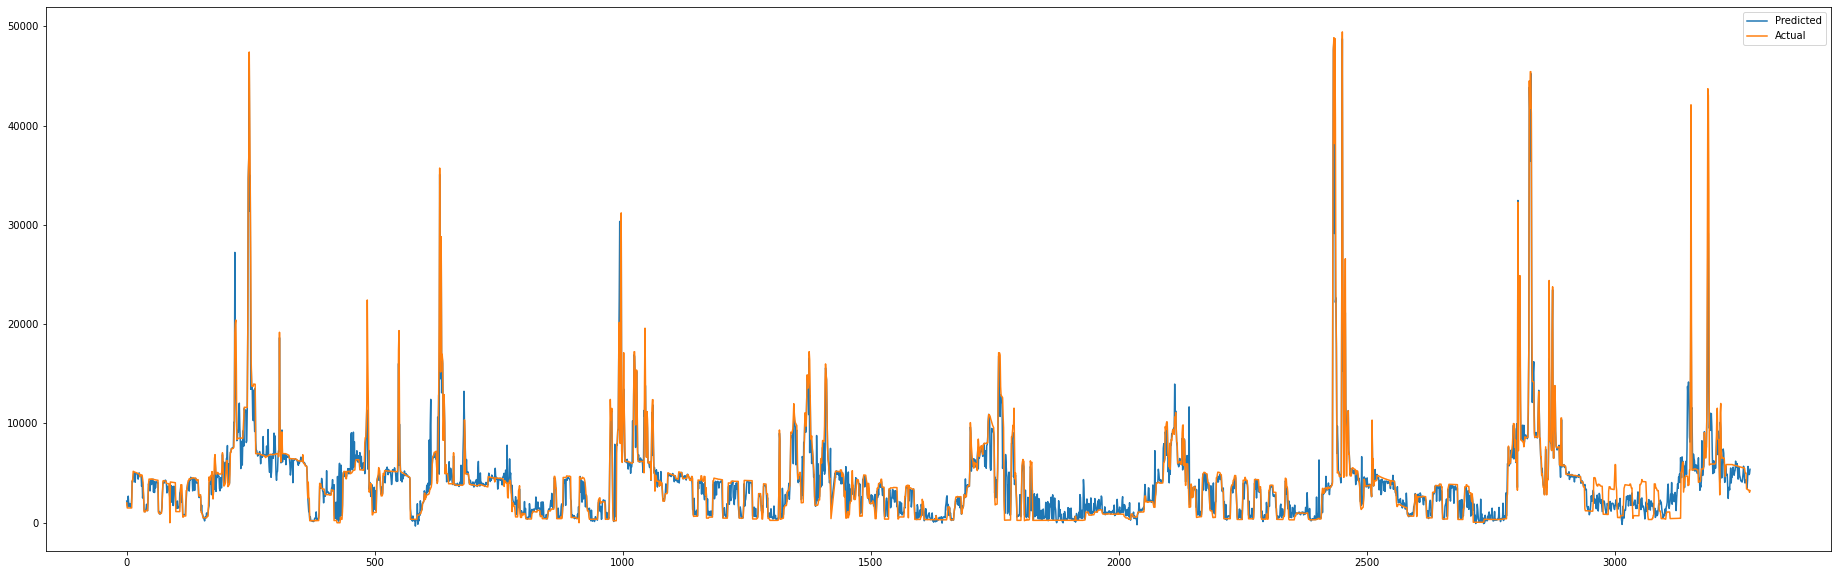

In [134]:
plt.figure(figsize=(32, 10))
plt.plot(inflow_pred_df['Predicted_Outflow'], label='Predicted')
plt.plot(inflow_pred_df['OUTFLOW_CUECS'], label='Actual')
plt.legend()
plt.show()

In [135]:
((y_train_inv_trf - y_pred_train) ** 2).mean() ** .5

1463.4100498334599

In [136]:
((y_val_inv_trf - y_pred_test) ** 2).mean() ** .5

2780.824921685438

In [154]:
feature_list = [['Month', 'Date', 'Season']] + [[f'{day_region}_temp', f'{day_region}_feels_like', f'{day_region}_temp_min', f'{day_region}_temp_max', f'{day_region}_pressure', f'{day_region}_humidity',
                                                 f'{day_region}_wind_speed', f'{day_region}_wind_deg', f'{day_region}_rain', f'{day_region}_clouds_all', f'{day_region}_broken clouds', f'{day_region}_overcast clouds',
                                                 f'{day_region}_scattered clouds', f'{day_region}_sky is clear', f'{day_region}_few clouds', f'{day_region}_fog', f'{day_region}_light rain', f'{day_region}_mist',
                                                 f'{day_region}_haze', f'{day_region}_moderate rain', f'{day_region}_heavy intensity rain', f'{day_region}_light intensity drizzle', f'{day_region}_drizzle',
                                                 f'{day_region}_heavy intensity drizzle', f'{day_region}_very heavy rain', f'{day_region}_thunderstorm with heavy rain', f'{day_region}_thunderstorm with rain',
                                                 f'{day_region}_thunderstorm', f'{day_region}_proximity shower rain', f'{day_region}_thunderstorm with light rain', f'{day_region}_shower rain',
                                                 f'{day_region}_light intensity shower rain', f'{day_region}_light thunderstorm'] for day_region in ['1_mysuru', '2_mysuru', '1_kodagu', '2_kodagu', '1_hassan', '2_hassan']]
feature_list = feature_list[0] + feature_list[1] + feature_list[2] + ['Inflow']#feature_list[3] + feature_list[4] + feature_list[5] + feature_list[6]
len(feature_list)

70

In [155]:
feature_list

['Month',
 'Date',
 'Season',
 '1_mysuru_temp',
 '1_mysuru_feels_like',
 '1_mysuru_temp_min',
 '1_mysuru_temp_max',
 '1_mysuru_pressure',
 '1_mysuru_humidity',
 '1_mysuru_wind_speed',
 '1_mysuru_wind_deg',
 '1_mysuru_rain',
 '1_mysuru_clouds_all',
 '1_mysuru_broken clouds',
 '1_mysuru_overcast clouds',
 '1_mysuru_scattered clouds',
 '1_mysuru_sky is clear',
 '1_mysuru_few clouds',
 '1_mysuru_fog',
 '1_mysuru_light rain',
 '1_mysuru_mist',
 '1_mysuru_haze',
 '1_mysuru_moderate rain',
 '1_mysuru_heavy intensity rain',
 '1_mysuru_light intensity drizzle',
 '1_mysuru_drizzle',
 '1_mysuru_heavy intensity drizzle',
 '1_mysuru_very heavy rain',
 '1_mysuru_thunderstorm with heavy rain',
 '1_mysuru_thunderstorm with rain',
 '1_mysuru_thunderstorm',
 '1_mysuru_proximity shower rain',
 '1_mysuru_thunderstorm with light rain',
 '1_mysuru_shower rain',
 '1_mysuru_light intensity shower rain',
 '1_mysuru_light thunderstorm',
 '2_mysuru_temp',
 '2_mysuru_feels_like',
 '2_mysuru_temp_min',
 '2_mysuru_

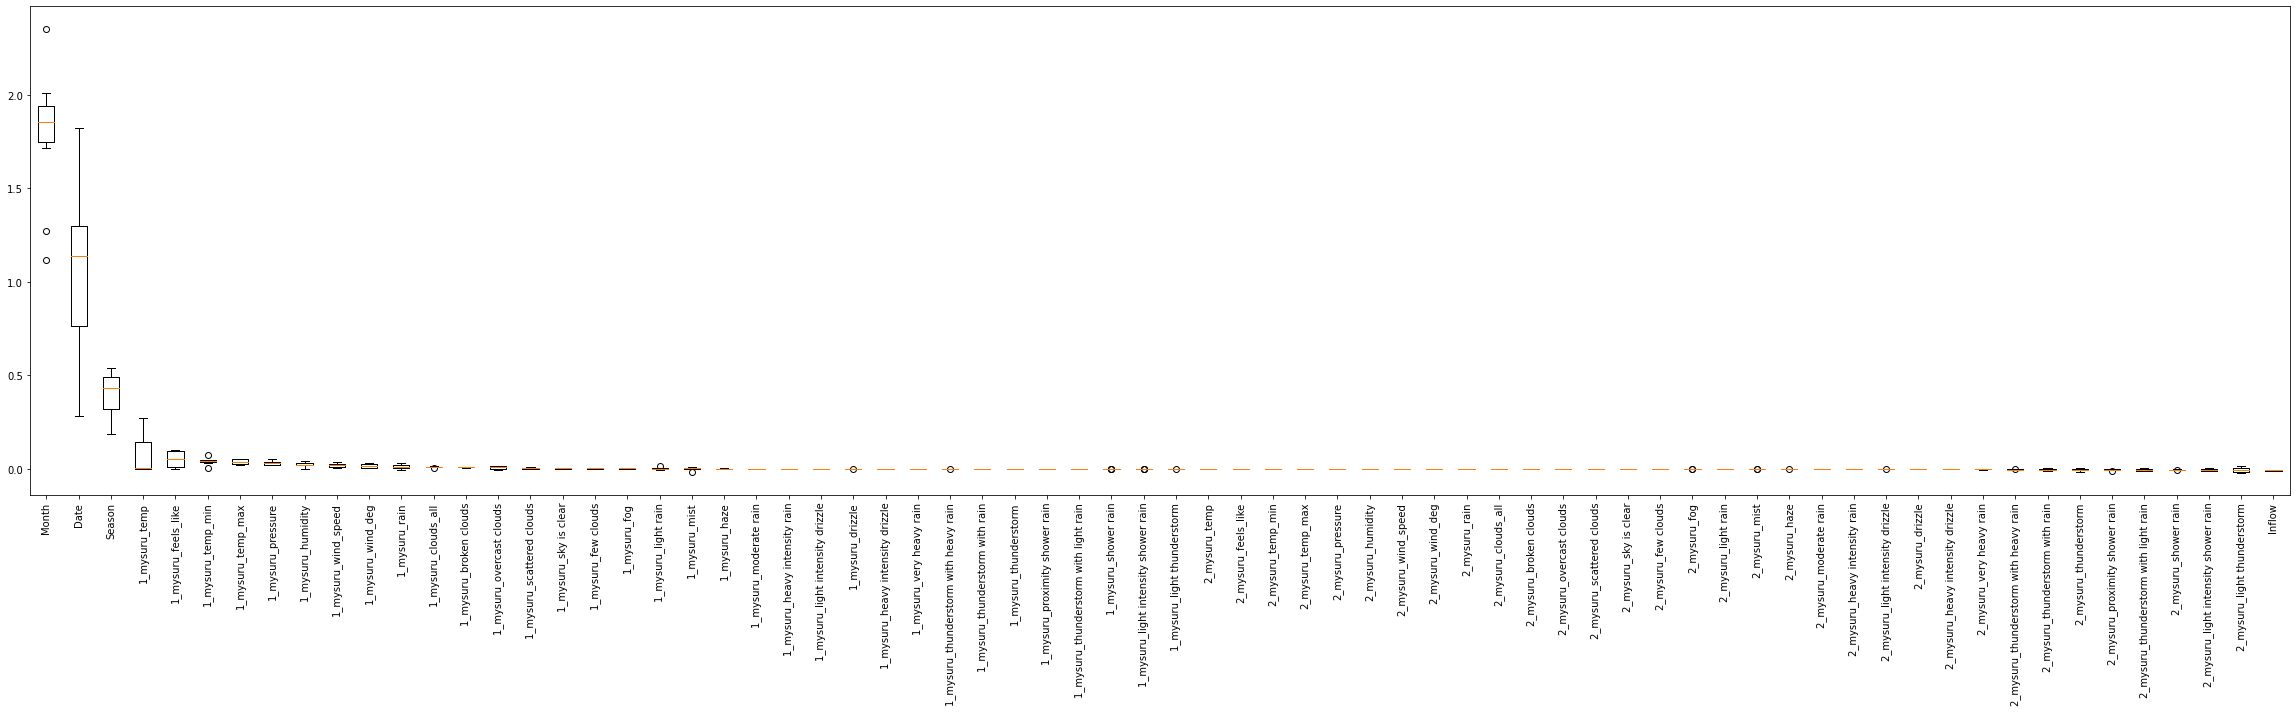

Season    : -0.008 +/- 0.002
2_mysuru_pressure: -0.006 +/- 0.012
2_mysuru_wind_speed: -0.005 +/- 0.006
2_mysuru_wind_deg: -0.004 +/- 0.002
2_mysuru_humidity: -0.004 +/- 0.005
1_mysuru_wind_deg: -0.004 +/- 0.003
2_mysuru_overcast clouds: -0.004 +/- 0.007
2_mysuru_scattered clouds: -0.004 +/- 0.003
1_mysuru_feels_like: -0.003 +/- 0.002
1_mysuru_scattered clouds: -0.001 +/- 0.001
1_mysuru_sky is clear: -0.001 +/- 0.001
2_mysuru_moderate rain: -0.000 +/- 0.000
1_mysuru_moderate rain: -0.000 +/- 0.000
1_mysuru_haze: -0.000 +/- 0.000
2_mysuru_light intensity drizzle: -0.000 +/- 0.000
1_mysuru_shower rain: -0.000 +/- 0.000
1_mysuru_heavy intensity rain: -0.000 +/- 0.000
1_mysuru_thunderstorm with light rain: -0.000 +/- 0.000
2_mysuru_thunderstorm with light rain: -0.000 +/- 0.000
2_mysuru_drizzle: 0.000 +/- 0.000
1_mysuru_proximity shower rain: 0.000 +/- 0.000
2_mysuru_proximity shower rain: 0.000 +/- 0.000
1_mysuru_thunderstorm with heavy rain: 0.000 +/- 0.000
1_mysuru_very heavy rain: 0.000

In [156]:
r = permutation_importance(model, X_val, y_val,
                           n_repeats=10,
                           random_state=0)

sort_idx = r.importances_mean.argsort()[::-1]

plt.figure(figsize=(32, 10))
plt.boxplot(r.importances[sort_idx].T, labels=feature_list)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

for i in sort_idx[::-1]:
    print(f"{feature_list[i]:10s}: {r.importances_mean[i]:.3f} +/- "
          f"{r.importances_std[i]:.3f}")

In [196]:
importance = model.feature_importances_
std = np.std([
    est.feature_importances_ for est in model.], axis=0)
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: {feature_list[i]}, Score: %.5f' % (v))
# plot feature importance
model_importances = pd.Series(importance, index=feature_list)
fig, ax = plt.subplots(figsize=(20, 10))
model_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

AttributeError: 'XGBRegressor' object has no attribute 'estimators_'

In [137]:
pickle.dump(automl, open('outflow_autosklearn_1463_2780.pkl','wb'))

In [138]:
with open('outflow_autosklearn_1463_2780.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [139]:
loaded_model.predict(X_val)

array([-4.50619914e-01, -4.86952047e-01, -5.51199792e-01, -4.62825582e-01,
       -5.46395521e-01, -6.52531527e-01, -6.09974559e-01, -5.52291203e-01,
       -3.82114331e-01, -2.15027249e-01, -3.31826009e-01, -3.41630002e-01,
       -1.62683521e-01, -8.77027992e-02, -1.82827676e-01, -3.85547888e-01,
       -2.86056095e-01, -3.02809626e-01, -3.76417922e-01, -5.13878192e-01,
       -2.48378523e-01, -1.98761335e-01, -5.15061211e-01, -5.65727070e-01,
       -3.21191400e-01, -1.60211874e-01, -1.97855864e-01, -3.59326800e-01,
       -3.90220024e-01, -3.01281039e-01, -4.48335584e-01, -5.80064304e-01,
       -4.68170328e-01, -3.33653554e-01, -3.40048609e-01, -3.37520140e-01,
       -3.98064011e-01, -5.14918538e-01, -5.64250236e-01, -6.29730577e-01,
       -5.84527997e-01, -3.92453860e-01, -4.09938864e-01, -4.32281061e-01,
       -4.22135690e-01, -4.44882330e-01, -5.15254257e-01, -3.44333444e-01,
       -5.49199529e-01, -5.70327125e-01, -3.95029714e-01, -3.85025876e-01,
       -3.90514081e-01, -

In [140]:
with open('encoders/rs_outflow.pkl', 'wb') as f:
    pickle.dump(rs_outflow, f)